In [70]:

# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# this allows plots to appear directly in the notebook
%matplotlib inline

data = pd.read_csv('Auto.data', delim_whitespace=True)
data.fillna(0)
data.rename(columns=lambda x: x.strip())
data['horsepower'] = data['horsepower'].str.strip().replace('?','0').astype(float)
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


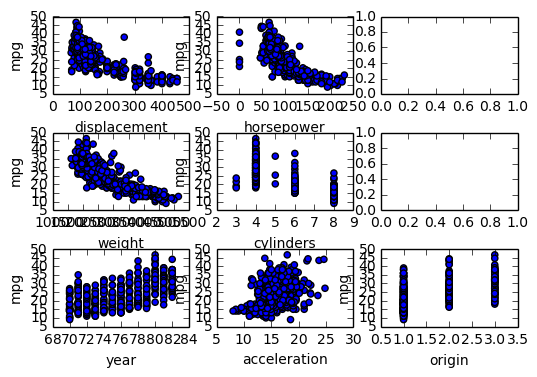

In [71]:
# visualize the relationship between the features and the response using scatterplots
#fig, axs = plt.subplots(1, 6, sharey=True)
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.subplots_adjust(hspace=.5)

data.plot(kind='scatter', x='displacement', y='mpg', ax=axes[0,0])
data.plot(kind='scatter', x='horsepower', y='mpg', ax=axes[0,1])
data.plot(kind='scatter', x='weight', y='mpg',ax=axes[1,0])
data.plot(kind='scatter', x='cylinders', y='mpg',ax=axes[1,1])
data.plot(kind='scatter', x='year', y='mpg',ax=axes[2,0])
data.plot(kind='scatter', x='acceleration', y='mpg',ax=axes[2,1])
data.plot(kind='scatter', x='origin', y='mpg',ax=axes[2,2])


In [72]:

# create a fitted model in one line
lm = smf.ols(formula='mpg ~ horsepower', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     543.5
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           3.10e-76
Time:                        01:12:36   Log-Likelihood:                -1207.8
No. Observations:                 397   AIC:                             2420.
Df Residuals:                     395   BIC:                             2428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.8792      0.707     55.019      0.000      37.490      40.268
horsepower    -0.1489      0.006    -23.314      0.000      -0.161      -0.136
==============================================================================
Omnibus:                       12.157   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.244
Skew:                           0.323   Prob(JB):                     0.000807
Kurtosis:                       3.667   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
X_new = pd.DataFrame({'horsepower': [98]})
X_new.head()

# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    24.283437
dtype: float64

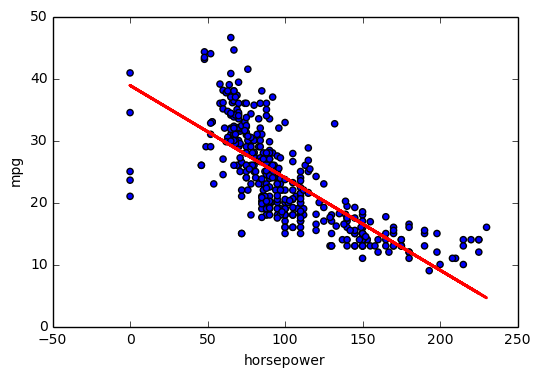

In [74]:
# first, plot the observed data
data.plot(kind='scatter', x='horsepower', y='mpg')

# then, plot the least squares line
plt.plot(data['horsepower'], lm.fittedvalues, c='red', linewidth=2)

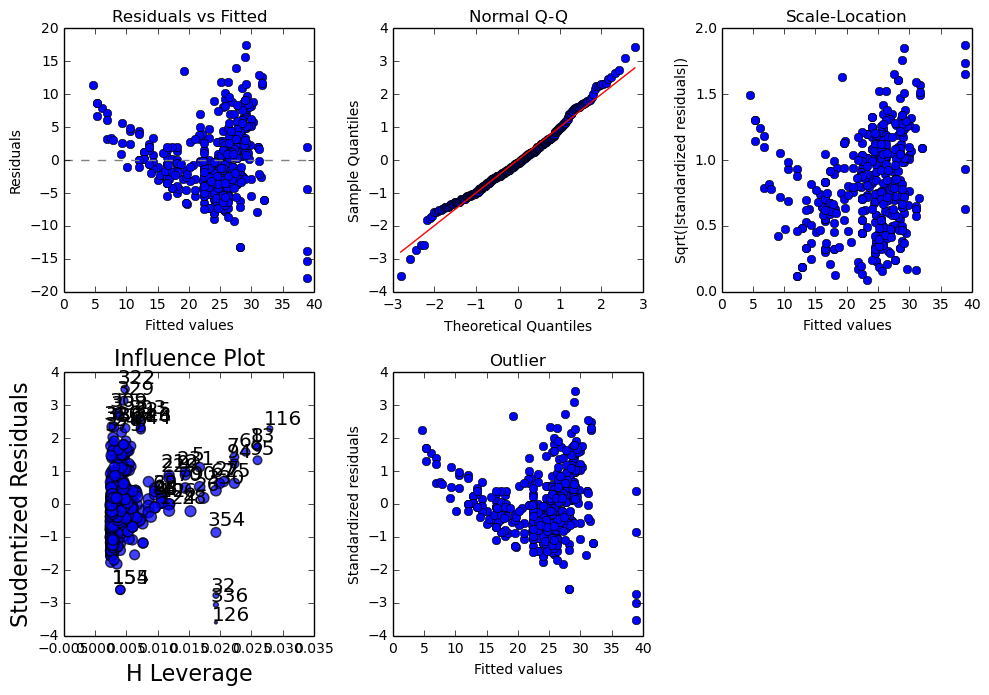

In [75]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

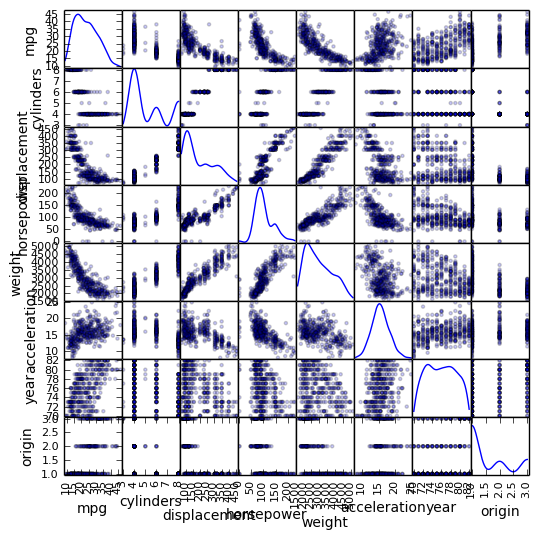

In [76]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')

plt.show()

In [77]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.761004,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.823711,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.876741,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.761004,0.823711,0.876741,1.000000,0.845483,-0.670643,-0.405830,-0.427052
weight,-0.831739,0.897017,0.933104,0.845483,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.670643,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.405830,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.427052,-0.581265,0.210084,0.184314,1.000000


In [78]:

# create a fitted model in one line
lm = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=data).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          1.28e-141
Time:                        01:13:01   Log-Likelihood:                -1036.8
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2121.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.9640      4.449     -4.038      0.000     -26.712      -9.216
cylinders       -0.4636      0.322     -1.441      0.150      -1.096       0.169
displacement     0.0200      0.007      2.688      0.007       0.005       0.035
horsepower      -0.0149      0.011     -1.335      0.183      -0.037       0.007
weight          -0.0066      0.001    -10.544      0.000      -0.008      -0.005
acceleration     0.0939      0.091      1.027      0.305      -0.086       0.274
year             0.7574      0.050     15.083      0.000       0.659       0.856
origin           1.4457      0.277      5.218      0.000       0.901       1.990
==============================================================================
Omnibus:                       30.358   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.913
Skew:                           0.513   Prob(JB):                     2.39e-11
Kurtosis:                       4.379   Cond. No.                     8.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

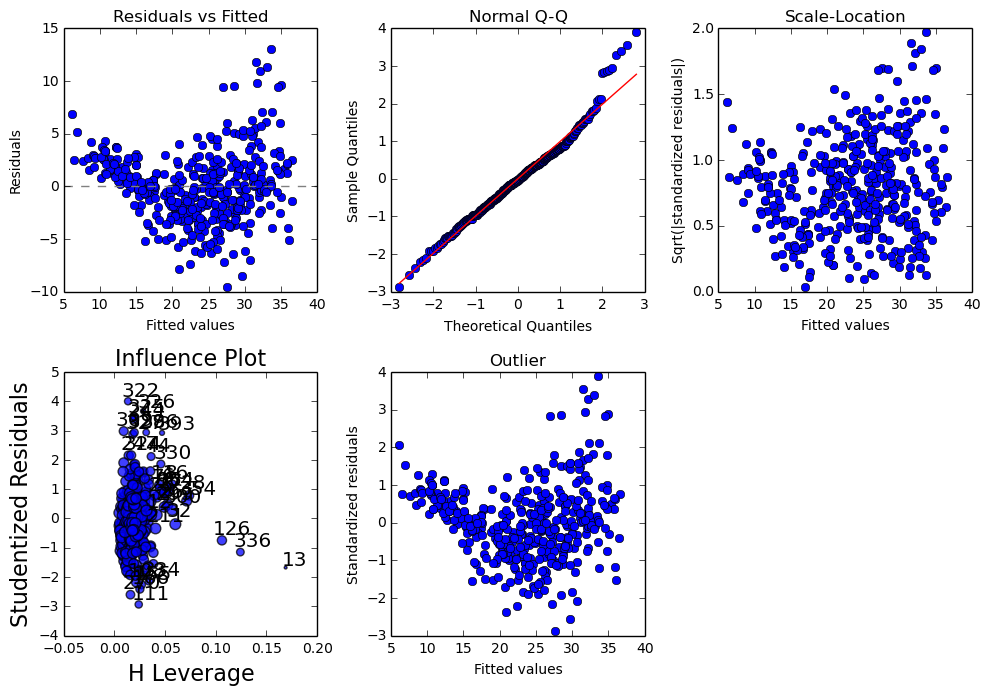

In [79]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

In [82]:
# create a fitted model in one lines
#Interaction terms remove additive assumption
lm = smf.ols(formula='mpg ~   weight * year + origin * weight + origin * year ', data=data).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     354.3
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          1.83e-154
Time:                        01:27:33   Log-Likelihood:                -1009.6
No. Observations:                 397   AIC:                             2033.
Df Residuals:                     390   BIC:                             2061.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -105.0084     20.341     -5.162      0.000    -145.000     -65.017
weight            0.0248      0.005      4.811      0.000       0.015       0.035
year              1.8716      0.271      6.918      0.000       1.340       2.403
weight:year      -0.0004   7.03e-05     -5.572      0.000      -0.001      -0.000
origin            4.4036      5.055      0.871      0.384      -5.535      14.342
origin:weight    -0.0015      0.000     -3.146      0.002      -0.002      -0.001
origin:year       0.0003      0.065      0.004      0.997      -0.127       0.128
==============================================================================
Omnibus:                       48.542   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.749
Skew:                           0.666   Prob(JB):                     8.04e-23
Kurtosis:                       5.092   Cond. No.                     3.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

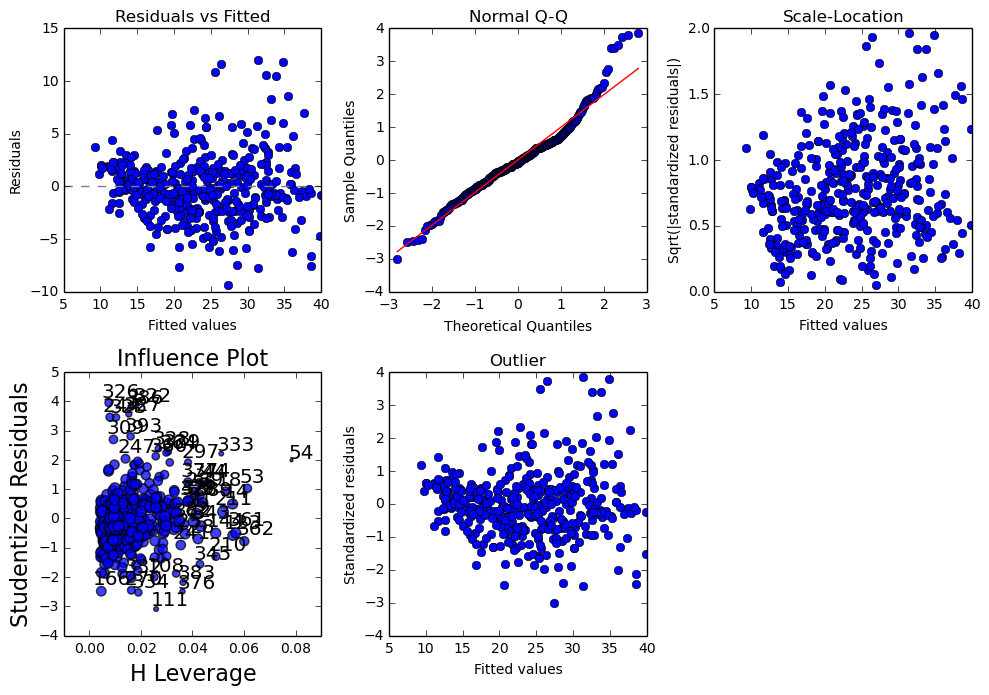

In [83]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

In [91]:
#Non Constant Variance by logging the mpg
#Notice how this non constant variance gave us bad p values.
#After we correct for this; p values goes up. 

# create a fitted model in one line
lm = smf.ols(formula='np.log(mpg) ~   weight * year + origin * weight + origin * year ', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     465.4
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          2.48e-174
Time:                        01:50:06   Log-Likelihood:                 282.07
No. Observations:                 397   AIC:                            -550.1
Df Residuals:                     390   BIC:                            -522.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3424      0.786      0.436      0.663      -1.203       1.888
weight            0.0001      0.000      0.548      0.584      -0.000       0.001
year              0.0466      0.010      4.457      0.000       0.026       0.067
weight:year   -5.068e-06   2.71e-06     -1.867      0.063   -1.04e-05    2.69e-07
origin            0.1170      0.195      0.599      0.550      -0.267       0.501
origin:weight -2.079e-05   1.83e-05     -1.134      0.257   -5.68e-05    1.53e-05
origin:year      -0.0005      0.003     -0.208      0.835      -0.005       0.004
==============================================================================
Omnibus:                       10.535   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               17.882
Skew:                          -0.123   Prob(JB):                     0.000131
Kurtosis:                       4.010   Cond. No.                     3.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
#We get the same R squared
# create a fitted model in one line
lm = smf.ols(formula='np.log(mpg) ~   weight : year + year ', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1366.
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          6.63e-178
Time:                        01:56:28   Log-Likelihood:                 276.45
No. Observations:                 397   AIC:                            -546.9
Df Residuals:                     394   BIC:                            -534.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7695      0.132      5.821      0.000       0.510       1.029
weight:year -4.146e-06   1.01e-07    -41.081      0.000   -4.34e-06   -3.95e-06
year            0.0429      0.002     25.754      0.000       0.040       0.046
==============================================================================
Omnibus:                        8.070   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               12.596
Skew:                          -0.082   Prob(JB):                      0.00184
Kurtosis:                       3.857   Cond. No.                     5.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
#We get the same R squared
# create a fitted model in one line
lm = smf.ols(formula='np.log(mpg) ~   weight : C(year) + C(year) ', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     128.9
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          4.66e-166
Time:                        01:58:38   Log-Likelihood:                 316.04
No. Observations:                 397   AIC:                            -580.1
Df Residuals:                     371   BIC:                            -476.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.9667      0.087     45.619      0.000       3.796       4.138
C(year)[T.71]         -0.1038      0.109     -0.957      0.339      -0.317       0.110
C(year)[T.72]         -0.1418      0.115     -1.233      0.218      -0.368       0.084
C(year)[T.73]         -0.3162      0.109     -2.898      0.004      -0.531      -0.102
C(year)[T.74]         -0.0086      0.112     -0.077      0.939      -0.229       0.212
C(year)[T.75]         -0.1547      0.125     -1.240      0.216      -0.400       0.091
C(year)[T.76]          0.0321      0.116      0.278      0.781      -0.195       0.259
C(year)[T.77]          0.0593      0.114      0.518      0.605      -0.166       0.284
C(year)[T.78]          0.2511      0.125      2.015      0.045       0.006       0.496
C(year)[T.79]          0.2424      0.125      1.941      0.053      -0.003       0.488
C(year)[T.80]          0.3877      0.150      2.586      0.010       0.093       0.682
C(year)[T.81]          0.1871      0.135      1.388      0.166      -0.078       0.452
C(year)[T.82]          0.3111      0.173      1.793      0.074      -0.030       0.652
weight:C(year)[70]    -0.0003    2.5e-05    -13.499      0.000      -0.000      -0.000
weight:C(year)[71]    -0.0003   2.05e-05    -13.929      0.000      -0.000      -0.000
weight:C(year)[72]    -0.0003   2.23e-05    -12.977      0.000      -0.000      -0.000
weight:C(year)[73]    -0.0002   1.85e-05    -13.348      0.000      -0.000      -0.000
weight:C(year)[74]    -0.0003   2.33e-05    -13.068      0.000      -0.000      -0.000
weight:C(year)[75]    -0.0003   2.74e-05     -9.542      0.000      -0.000      -0.000
weight:C(year)[76]    -0.0003   2.39e-05    -13.096      0.000      -0.000      -0.000
weight:C(year)[77]    -0.0003   2.38e-05    -12.808      0.000      -0.000      -0.000
weight:C(year)[78]    -0.0004   3.05e-05    -12.289      0.000      -0.000      -0.000
weight:C(year)[79]    -0.0003   2.85e-05    -11.726      0.000      -0.000      -0.000
weight:C(year)[80]    -0.0004   4.94e-05     -7.142      0.000      -0.000      -0.000
weight:C(year)[81]    -0.0003      4e-05     -7.529      0.000      -0.000      -0.000
weight:C(year)[82]    -0.0003   6.11e-05     -5.549      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       12.236   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.544
Skew:                          -0.246   Prob(JB):                     0.000155
Kurtosis:                       3.904   Cond. No.                     6.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

In [116]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})

data['mpg'].describe()



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
124,11,8,350,180,3664,11,73,1,oldsmobile omega
166,13,8,302,129,3169,12,75,1,ford mustang ii
386,38,6,262,85,3015,17,82,1,oldsmobile cutlass ciera (diesel)


In [117]:
#Outliers 
data[abs(results['std_resids']) > 3 ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
124,11,8,350,180,3664,11,73,1,oldsmobile omega
166,13,8,302,129,3169,12,75,1,ford mustang ii
386,38,6,262,85,3015,17,82,1,oldsmobile cutlass ciera (diesel)


In [118]:
#Remove outliers
data = data[abs(results['std_resids']) < 3 ]


In [119]:
#Notice their p value estimates
lm = smf.ols(formula='np.log(mpg) ~   weight : C(year) + C(year) ', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     139.9
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          4.43e-171
Time:                        02:16:23   Log-Likelihood:                 332.86
No. Observations:                 394   AIC:                            -613.7
Df Residuals:                     368   BIC:                            -510.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.9667      0.083     47.886      0.000       3.804       4.130
C(year)[T.71]         -0.1038      0.103     -1.004      0.316      -0.307       0.099
C(year)[T.72]         -0.1418      0.110     -1.295      0.196      -0.357       0.074
C(year)[T.73]         -0.3153      0.104     -3.034      0.003      -0.520      -0.111
C(year)[T.74]         -0.0086      0.107     -0.081      0.936      -0.218       0.201
C(year)[T.75]         -0.1396      0.119     -1.174      0.241      -0.373       0.094
C(year)[T.76]          0.0321      0.110      0.291      0.771      -0.184       0.249
C(year)[T.77]          0.0593      0.109      0.544      0.587      -0.155       0.274
C(year)[T.78]          0.2511      0.119      2.115      0.035       0.018       0.485
C(year)[T.79]          0.2424      0.119      2.038      0.042       0.008       0.476
C(year)[T.80]          0.3877      0.143      2.715      0.007       0.107       0.669
C(year)[T.81]          0.1871      0.128      1.457      0.146      -0.065       0.440
C(year)[T.82]          0.4786      0.171      2.798      0.005       0.142       0.815
weight:C(year)[70]    -0.0003   2.38e-05    -14.170      0.000      -0.000      -0.000
weight:C(year)[71]    -0.0003   1.95e-05    -14.621      0.000      -0.000      -0.000
weight:C(year)[72]    -0.0003   2.12e-05    -13.622      0.000      -0.000      -0.000
weight:C(year)[73]    -0.0002   1.77e-05    -13.867      0.000      -0.000      -0.000
weight:C(year)[74]    -0.0003   2.22e-05    -13.717      0.000      -0.000      -0.000
weight:C(year)[75]    -0.0003   2.61e-05    -10.024      0.000      -0.000      -0.000
weight:C(year)[76]    -0.0003   2.28e-05    -13.746      0.000      -0.000      -0.000
weight:C(year)[77]    -0.0003   2.27e-05    -13.444      0.000      -0.000      -0.000
weight:C(year)[78]    -0.0004    2.9e-05    -12.900      0.000      -0.000      -0.000
weight:C(year)[79]    -0.0003   2.72e-05    -12.309      0.000      -0.000      -0.000
weight:C(year)[80]    -0.0004    4.7e-05     -7.497      0.000      -0.000      -0.000
weight:C(year)[81]    -0.0003   3.81e-05     -7.903      0.000      -0.000      -0.000
weight:C(year)[82]    -0.0004   6.14e-05     -6.738      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        4.239   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                4.140
Skew:                          -0.184   Prob(JB):                        0.126
Kurtosis:                       3.341   Cond. No.                     6.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

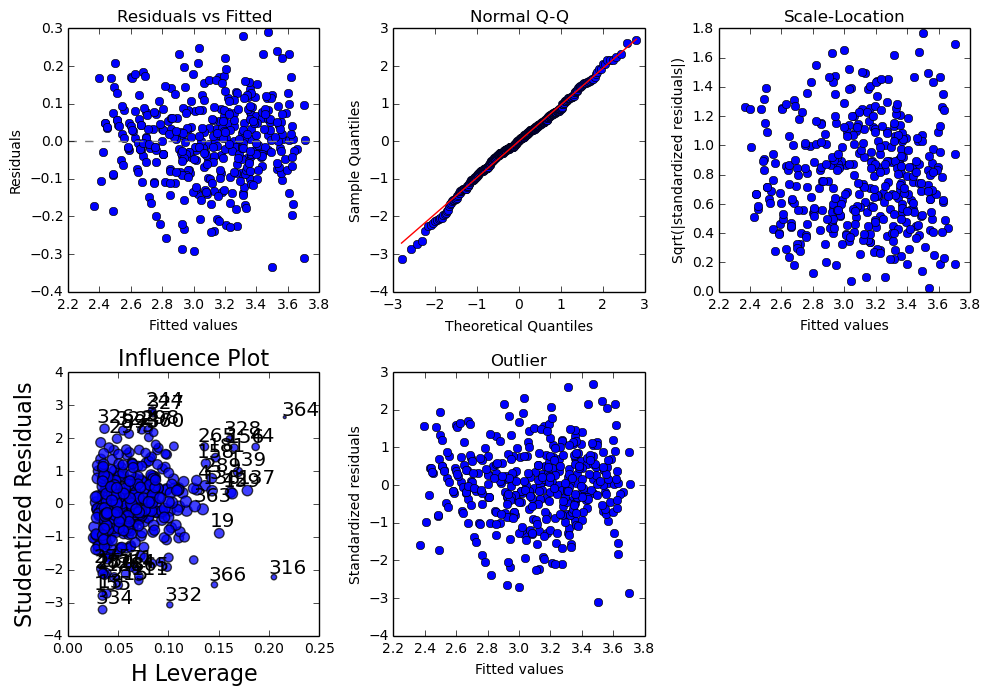

In [120]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()